In [ ]:
# ----------------------------------------------------------
# Hyperbola and Synthetic Seismogram Analysis
# Analysis of reflection hyperbolas and generation of synthetic seismograms
# ----------------------------------------------------------

import sys
sys.path.append('../src')  # Add src folder to the path

import numpy as np
import matplotlib.pyplot as plt

# Import functions for travel-time calculations and raypath models
from raypaths import (
    calculate_travel_times_depth_velocity_tradeoff,
    generate_hyperbola_curves, 
    generate_ambiguous_models
)

# Import functions for synthetic seismogram generation and plotting
from synthetic_seismograms import (
    ricker_wavelet, generate_synthetic_seismogram, 
    plot_comparison_seismograms
)


In [ ]:
# ----------------------------------------------------------
# Global plotting style and acquisition parameters
# ----------------------------------------------------------

# Set plot style
plt.style.use('seaborn-v0_8-white')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True

# Acquisition geometry
source_x = 0  # Source position at x=0
n_receivers = 100
receiver_x = np.linspace(-1500, 1500, n_receivers)  # Receiver spread

# Subsurface model parameters
reflector_depth = 400  # Reflector depth in meters
velocity = 2000        # Constant velocity in m/s

# Time sampling for synthetic seismograms
duration = 1.2   # Total recording time in seconds
dt = 0.002       # Time step in seconds
frequency = 25   # Ricker wavelet central frequency in Hz


In [ ]:
# ----------------------------------------------------------
# Generate hyperbola curves and synthetic seismograms
# for horizontal and dipping reflectors
# ----------------------------------------------------------

# Dip angles to analyze
dip_angles = [0, 15, 30]  # in degrees

# Generate ambiguous models (horizontal, dip, trade-off, etc.)
ambiguous_models = generate_ambiguous_models(source_x, receiver_x, reflector_depth, velocity)

# Generate travel-time curves for different dip angles
hyperbolas = generate_hyperbola_curves(source_x, receiver_x, reflector_depth, velocity, dip_angles)

# Generate Ricker wavelet (to simulate source pulse)
t, wavelet = ricker_wavelet(frequency, 0.15, dt)

# Generate synthetic seismograms for each dip angle
seismograms = {}
for angle, travel_times in hyperbolas.items():
    seismograms[angle] = generate_synthetic_seismogram(travel_times, wavelet, duration, dt, 0.02)

ambiguous_seismograms = {}
for key, travel_times in ambiguous_models.items():
    ambiguous_seismograms[key] = generate_synthetic_seismogram(travel_times, wavelet, duration, dt, 0.02)

# Plot comparison of seismograms for different dips
plot_comparison_seismograms(
    [seismograms[a] for a in dip_angles], 
    receiver_x, duration,
    [f"Dip {a}º" for a in dip_angles]
)

plt.figure()
for angle, travel_times in hyperbolas.items():
    plt.plot(receiver_x, travel_times, label=f"Dip {angle}°")
plt.xlabel("Offset (m)")
plt.ylabel("Travel time (s)")
plt.title("Travel-time curves: Horizontal vs Dipping Reflector")
plt.legend()
plt.grid(True)


In [ ]:
# ----------------------------------------------------------
# Depth-Velocity trade-off example
# Demonstrates that different (depth, velocity) pairs can
# produce very similar travel times and seismograms
# ----------------------------------------------------------

tradeoff_models = calculate_travel_times_depth_velocity_tradeoff(
    source_x, receiver_x,
    [(reflector_depth+9, velocity+35), (reflector_depth+20, velocity+80)]
)

tradeoff_seismograms = {}
for key, travel_times in tradeoff_models.items():
    tradeoff_seismograms[key] = generate_synthetic_seismogram(travel_times, wavelet, duration, dt, 0.02)

# Plot comparison of trade-off scenarios
plot_comparison_seismograms(
    list(tradeoff_seismograms.values()),
    receiver_x, duration,
    [f"Depth={d}m, V={v}m/s" for (d, v) in tradeoff_models.keys()]
)

plt.figure()
for (d, v), times in tradeoff_models.items():
    plt.plot(receiver_x, times, label=f"Depth={d}m, V={v}m/s")
plt.xlabel("Offset (m)")
plt.ylabel("Travel time (s)")
plt.title("Depth-Velocity Tradeoff (Travel-time curves)")
plt.legend()
plt.grid(True)


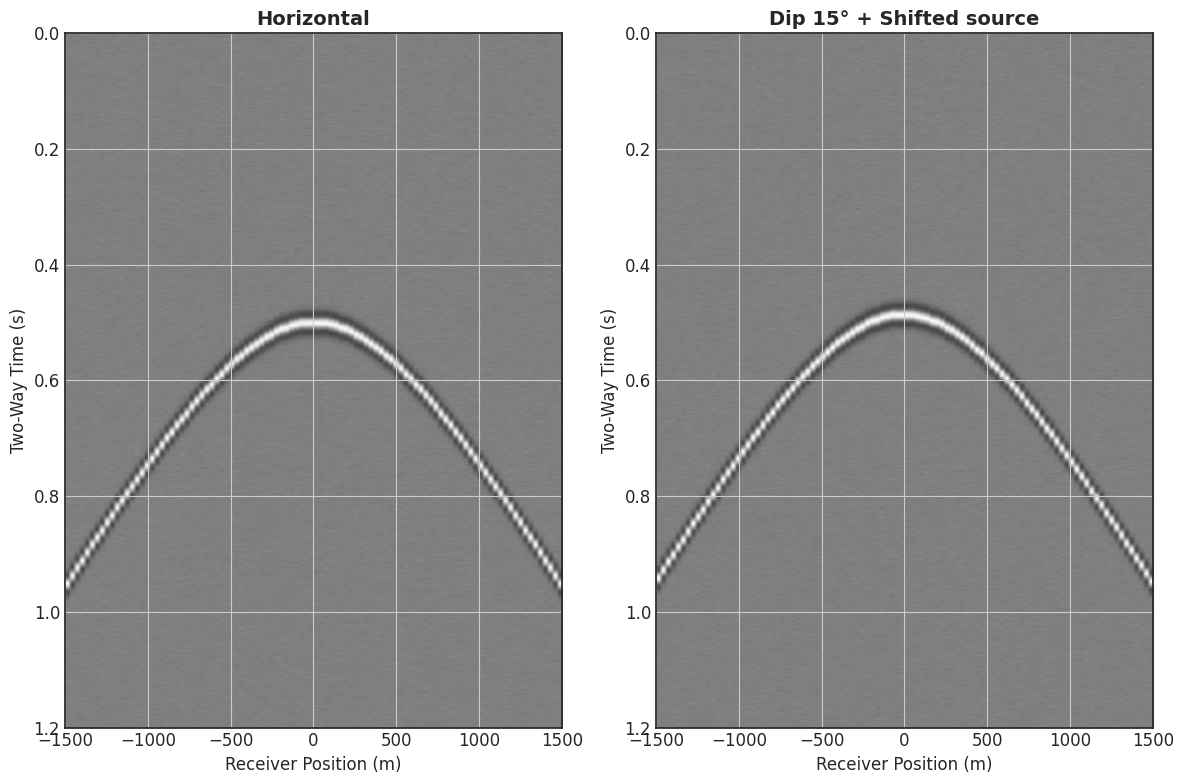

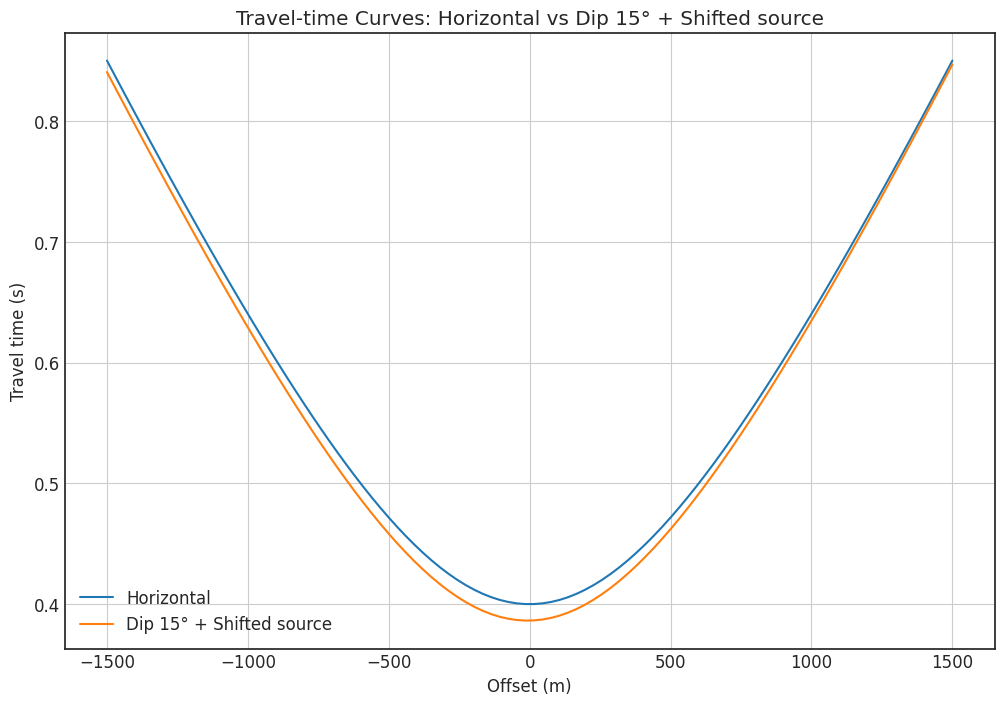

In [8]:
# ----------------------------------------------------------
# Ambiguity between horizontal reflector and
# dipping reflector with shifted source
# ----------------------------------------------------------

plot_comparison_seismograms(
    [ambiguous_seismograms["horizontal"], ambiguous_seismograms["dip_15_shifted"]],
    receiver_x, duration,
    ["Horizontal", "Dip 15° + Shifted source"]
)

plt.figure()
plt.plot(receiver_x, ambiguous_models["horizontal"], label="Horizontal")
plt.plot(receiver_x, ambiguous_models["dip_15_shifted"], label="Dip 15° + Shifted source")
plt.xlabel("Offset (m)")
plt.ylabel("Travel time (s)")
plt.title("Travel-time Curves: Horizontal vs Dip 15° + Shifted source")
plt.legend()
plt.grid(True)
